Part A

Importing, cleaning and numerical summaries

Here I import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

and the file with the data to analyse.

In [2]:
df = pd.read_csv('data.csv')

Checking the amount of abservations,

In [4]:
N_observs=df.shape[0]
print(N_observs)

153


obtaining the data heading

In [3]:
Column_head=df.head()
Column_head

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe


and data types for each column.

In [5]:
df.dtypes


Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

Here I create a new DataFrame without rows containing missing values

In [6]:
df_nomiss=df.dropna().copy()
df_nomiss.shape[0]


151

and create a table containing mean, minimum and maximum values for each column with numerical data.

In [7]:
headers_raw=df_nomiss.columns.get_values()
headers=headers_raw[2:11]
C_mean=[]
C_min=[]
C_max=[]
for i in range (2,11):
    C_mean.append(df_nomiss.iloc[:, i].mean())
    C_min.append(df_nomiss.iloc[:, i].min())
    C_max.append(df_nomiss.iloc[:, i].max())
Col_char=pd.DataFrame([C_mean, C_min, C_max], columns=headers, index= ['mean', 'min','max'])
Col_char
   

,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
mean,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
max,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


List of the 10 happiest countries:

In [8]:
df_nomiss.sort_values('Happiness Rank').iloc[0:10,0]

0         Norway
1        Denmark
2        Iceland
3    Switzerland
4        Finland
5    Netherlands
6         Canada
7    New Zealand
8         Sweden
9      Australia
Name: Country, dtype: object

and of the least happy ones:

In [9]:
df_nomiss.sort_values('Happiness Rank', ascending = False).iloc[0:10,0]

152    Central African Republic
151                     Burundi
150                    Tanzania
149                       Syria
148                      Rwanda
147                        Togo
146                      Guinea
145                     Liberia
143                       Yemen
142                       Haiti
Name: Country, dtype: object

Part B

Indexing and grouping

Here I group the countries by their region and check that I have a reasonable outcome:

In [10]:
Region_data=df_nomiss.groupby('Region')
Region_data.describe()

Corruption                                                    \
                    count      mean       std       min       25%       50%   
Region                                                                        
Africa               43.0  0.100776  0.071673  0.025336  0.065338  0.086723   
Asia-Pacific         43.0  0.148947  0.115798  0.015317  0.064442  0.107216   
Eastern Europe       21.0  0.050637  0.045815  0.000000  0.024211  0.041238   
Europe                1.0  0.023029       NaN  0.023029  0.023029  0.023029   
Latin America        22.0  0.087764  0.037608  0.008965  0.061481  0.086134   
North America         2.0  0.211505  0.107291  0.135639  0.173572  0.211505   
Western Europe       19.0  0.231367  0.126064  0.015869  0.153296  0.265428   

                                   Dystopia            ...     Health  \
                     75%       max    count      mean  ...        75%   
Region                                                 ...              
Africa          0.114921  0.455220     43.0  1.784001  ...   0.347583   
Asia-Pacific    0.230844  0.464308     43.0  1.649736  ...   0.681616   
Eastern Europe  0.059308  0.183249     21.0  1.825065  ...   0.708218   
Europe          0.023029  0.023029      1.0  0.814382  ...   0.575904   
Latin America   0.108346  0.178062     22.0  2.301928  ...   0.692762   
North America   0.249438  0.287372      2.0  2.202689  ...   0.819490   
Western Europe  0.317399  0.400770     19.0  2.013270  ...   0.839009   

                         Job Satisfaction                                     \
                     max            count       mean        std   min    25%   
Region                                                                         
Africa          0.638007             43.0  61.193023  10.536770  44.4  54.00   
Asia-Pacific    0.949492             43.0  77.834884   9.347546  50.7  72.15   
Eastern Europe  0.844715             21.0  77.628571   6.272730  68.5  73.30   
Europe          0.575904              1.0  72.300000        NaN  72.3  72.30   
Latin America   0.819480             22.0  81.104545   8.363838  48.5  79.80   
North America   0.834558              2.0  87.900000   3.676955  85.3  86.60   
Western Europe  0.888961             19.0  90.310526   4.124035  79.8  87.75   

                                    
                  50%    75%   max  
Region                              
Africa          57.80  69.50  86.0  
Asia-Pacific    79.80  83.85  93.7  
Eastern Europe  77.10  82.10  88.7  
Europe          72.30  72.30  72.3  
Latin America   82.35  84.40  90.1  
North America   87.90  89.20  90.5  
Western Europe  91.20  93.60  95.1  

[7 rows x 80 columns]

As here we have 7 regions instead of desired 6 (there is one country decribed as 'Europe' by its region), we will check out what is going on:

In [11]:
df_nomiss[df_nomiss.Region=='Europe']

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
129,Ukraine,132,4.096,0.894652,1.394538,0.575904,0.122975,0.270061,0.023029,0.814382,72.3,Europe


As Ukraine is considered to be in the Eastern Europe, we will fix that

In [12]:
df_nomiss.loc[df_nomiss.Region=='Europe','Region']='Eastern Europe'

In [13]:
Region_happiness=df_nomiss.groupby('Region')['Happiness Score'].mean()
Region_happiness.sort_values(ascending=False)

Region
North America     7.154500
Western Europe    6.880474
Latin America     5.957818
Eastern Europe    5.435182
Asia-Pacific      5.358326
Africa            4.254581
Name: Happiness Score, dtype: float64

The number of countries in each region that have a happiness score above 6.0:

In [14]:
Happy_lands=df_nomiss[df_nomiss['Happiness Score']>6].groupby('Region')
Happy_lands.describe().iloc[:,0]


Region
Asia-Pacific      11.0
Eastern Europe     1.0
Latin America     13.0
North America      2.0
Western Europe    17.0
Name: (Corruption, count), dtype: float64

Computing the maximum and the minimum happiness score per regions

In [15]:
Happy_lands_max=df_nomiss.groupby('Region')['Happiness Score'].max()
print('MAX happiness', Happy_lands_max)
Happy_lands_min=df_nomiss.groupby('Region')['Happiness Score'].min()
print('MIN happiness',Happy_lands_min)

MAX happiness Region
Africa            5.872
Asia-Pacific      7.314
Eastern Europe    6.098
Latin America     7.079
North America     7.316
Western Europe    7.537
Name: Happiness Score, dtype: float64
MIN happiness Region
Africa            2.693
Asia-Pacific      3.462
Eastern Europe    4.096
Latin America     3.603
North America     6.993
Western Europe    5.195
Name: Happiness Score, dtype: float64


ans calculate the range of happiness

In [16]:
Range=Happy_lands_max-Happy_lands_min
Range.sort_values(ascending=False)

Region
Asia-Pacific      3.852
Latin America     3.476
Africa            3.179
Western Europe    2.342
Eastern Europe    2.002
North America     0.323
Name: Happiness Score, dtype: float64

Here is the region with the largest range of happiness scores:

In [17]:
Range.sort_values(ascending=False).iloc[0:1]

Region
Asia-Pacific    3.852
Name: Happiness Score, dtype: float64

Part C

Bar plot of the Happiness Score

First  import the necessary libraries and state that we want to display the plots directly in the notebook

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

Here I make a new DataFrame of the data I'm going to work with

In [19]:
top10_cont=df_nomiss.iloc[0:10]
top10_cont

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
5,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
6,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
7,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
8,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe
9,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific


and build a horizontal bar plot

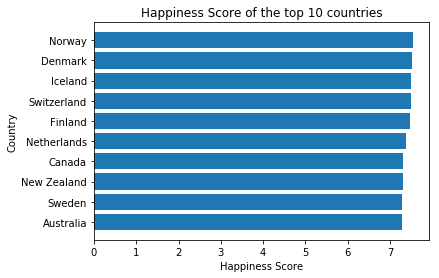

In [20]:
fig, ax = plt.subplots()

countries = top10_cont.Country
y_pos = np.arange(len(top10_cont.Country))
score = top10_cont['Happiness Score']

ax.barh(y_pos, score, align='center', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Happiness Score')
ax.set_ylabel('Country')
ax.set_title('Happiness Score of the top 10 countries')

plt.show()

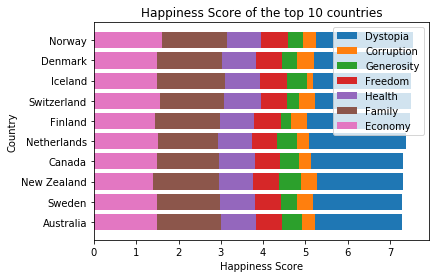

In [21]:
fig, ax = plt.subplots()

countries = top10_cont.Country
y_pos = np.arange(len(countries))
Economy=top10_cont.Economy

ax.barh(y_pos, top10_cont.Economy+top10_cont.Family+top10_cont.Health+top10_cont.Freedom+top10_cont.Generosity+top10_cont.Corruption+top10_cont.Dystopia, 
        align='center', ecolor='black', label='Dystopia')
ax.barh(y_pos, top10_cont.Economy+top10_cont.Family+top10_cont.Health+top10_cont.Freedom+top10_cont.Generosity+top10_cont.Corruption, 
        align='center', ecolor='black', label='Corruption')
ax.barh(y_pos, top10_cont.Economy+top10_cont.Family+top10_cont.Health+top10_cont.Freedom+top10_cont.Generosity, 
        align='center', ecolor='black', label='Generosity')
ax.barh(y_pos, top10_cont.Economy+top10_cont.Family+top10_cont.Health+top10_cont.Freedom, 
        align='center', ecolor='black', label='Freedom')
ax.barh(y_pos, top10_cont.Economy+top10_cont.Family+top10_cont.Health, align='center', ecolor='black', label='Health')
ax.barh(y_pos, top10_cont.Economy+top10_cont.Family, align='center', ecolor='black', label='Family')
ax.barh(y_pos, top10_cont.Economy, align='center', ecolor='black', label='Economy')


ax.set_yticks(y_pos)
ax.set_yticklabels(countries)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Happiness Score')
ax.set_ylabel('Country')
ax.legend()
ax.set_title('Happiness Score of the top 10 countries')

plt.show()

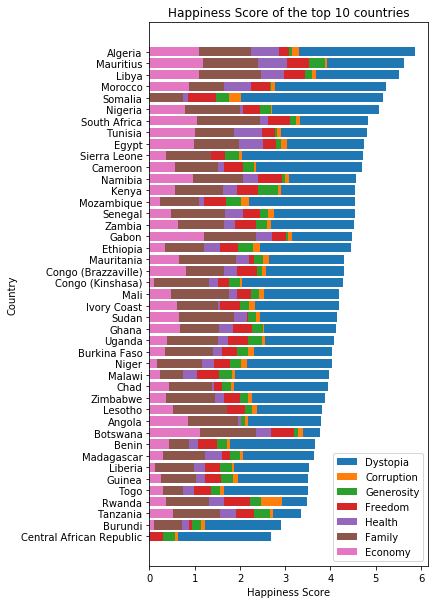

In [22]:
fig, ax = plt.subplots(figsize=(5, 10))

Africas = df_nomiss[df_nomiss.Region=='Africa']
countries=Africas.Country
y_pos = np.arange(len(countries))


ax.barh(y_pos, Africas.Economy+Africas .Family+Africas.Health+Africas.Freedom+Africas.Generosity+Africas.Corruption+Africas.Dystopia, 
        align='center', ecolor='black', label='Dystopia')
ax.barh(y_pos, Africas.Economy+Africas.Family+Africas.Health+Africas.Freedom+Africas.Generosity+Africas.Corruption, 
        align='center', ecolor='black', label='Corruption')
ax.barh(y_pos, Africas.Economy+Africas.Family+Africas.Health+Africas.Freedom+Africas.Generosity, 
        align='center', ecolor='black', label='Generosity')
ax.barh(y_pos, Africas.Economy+Africas.Family+Africas.Health+Africas.Freedom, 
        align='center', ecolor='black', label='Freedom')
ax.barh(y_pos, Africas.Economy+Africas.Family+Africas.Health, align='center', ecolor='black', label='Health')
ax.barh(y_pos, Africas.Economy+Africas.Family, align='center', ecolor='black', label='Family')
ax.barh(y_pos, Africas.Economy, align='center', ecolor='black', label='Economy')


ax.set_yticks(y_pos)
ax.set_yticklabels(countries)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Happiness Score')
ax.set_ylabel('Country')
ax.legend()
ax.set_title('Happiness Score of the top 10 countries')

plt.show(fig)

Part D

Histogram of Job Satisfaction

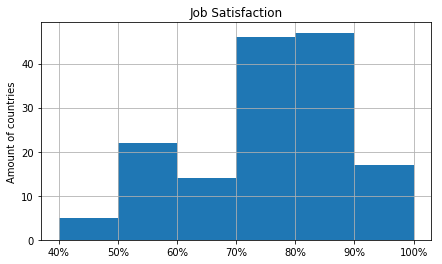

In [23]:
fig=plt.figure(figsize=(7,4))
ax=df_nomiss['Job Satisfaction'].hist (range=[40,100], bins=6)
ax.set_title('Job Satisfaction')
ax.set_ylabel('Amount of countries')
vals = ax.get_xticks()
ax.set_xticklabels(['{0:.0%}'.format(x/100) for x in vals]);
              
plt.show(fig)

Part E

Pairwise Scatter Plots

First I import Seaborn library

In [24]:
 import seaborn as sns

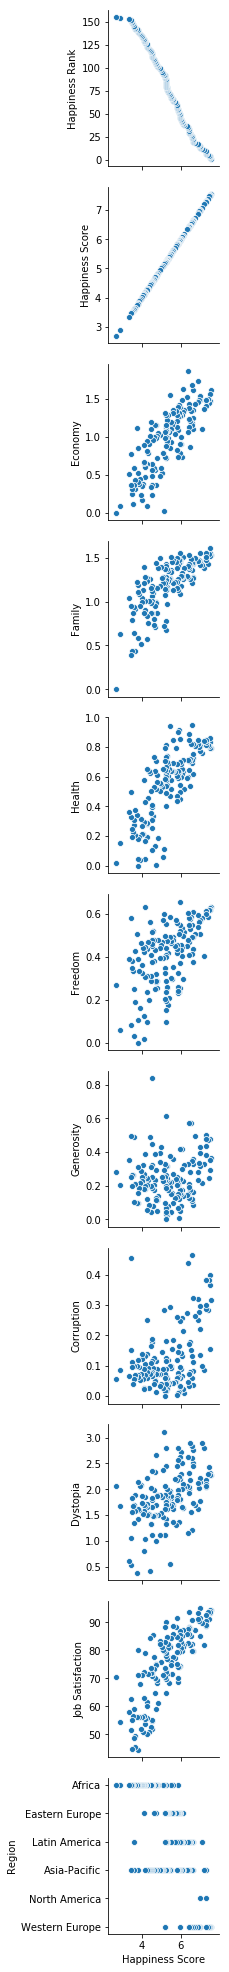

In [25]:
headers_raw=df_nomiss.columns.get_values()

sns.pairplot(df_nomiss, x_vars=['Happiness Score'], y_vars=headers_raw[1:12])
plt.show()

Part F

The correlation between the Happiness Score and each of the other variables

In [26]:
Corr_HS=df_nomiss.corr()['Happiness Score']
Corr_HS


Happiness Rank     -0.992663
Happiness Score     1.000000
Economy             0.808678
Family              0.749612
Health              0.777731
Freedom             0.567948
Generosity          0.164123
Corruption          0.438262
Dystopia            0.481117
Job Satisfaction    0.812873
Name: Happiness Score, dtype: float64

And the variable that has the highest correlation with the Happiness Score (excluding the Happiness Score itself) is:

In [27]:
Corr_HS[Corr_HS!=1].sort_values(ascending=False).iloc[0:1]

Job Satisfaction    0.812873
Name: Happiness Score, dtype: float64

Part G

Probabilities

Let's check it up with Python's random module

In [31]:
import random
experiments = 100000
counter = 0
for i in range(experiments):
    curr_country= Happy_lands.Region[random.randrange(len(Happy_lands.Region))]
    if curr_country=='Western Europe' :
        counter += 1

p_exp=counter / experiments
p_exp

0.3863

Now let's calculate the probability theoretically and check the answer.

First let's determine the number of countries with Happiness Score over 6.0 . That will be the outcome space.

In [28]:
Happy_lands=df_nomiss[df_nomiss['Happiness Score']>6]
P_total=Happy_lands.shape[0]
P_total

44

Now let's check how many of them are from Western Europe

In [29]:
Happy_lands_WE=Happy_lands[Happy_lands.Region=='Western Europe']
P_pos=Happy_lands_WE.shape[0]
P_pos

17

So the chances to randomly selected country with Happiness score over 6.0 and to get one from Western Europe are

In [30]:
p_theor=P_pos/P_total
p_theor

0.38636363636363635

Indeed, the results of theoretical calculation and of computer simulated experiment are very close.

Part H

Matrices

Luckily there is a function in pandas that returns a contingency table (a table showing frequency distribution of one variable in rows and another on columns).

In [32]:
pd.crosstab(df_nomiss.Country, df_nomiss.Region)

Region,Africa,Asia-Pacific,Eastern Europe,Latin America,North America,Western Europe
Country,,,,,,
Afghanistan,0,1,0,0,0,0
Albania,0,0,1,0,0,0
Algeria,1,0,0,0,0,0
Angola,1,0,0,0,0,0
Argentina,0,0,0,1,0,0
Armenia,0,1,0,0,0,0
Australia,0,1,0,0,0,0
Austria,0,0,0,0,0,1
Azerbaijan,0,1,0,0,0,0
